## Part A
###1.Describe the importance of training and test data.  Why do we separate data into these subsets?

They are both important but with different purposes.

Training data helps us to train the model and help the model recognize how important different variables play roles in regression or classification to the target variables.

Test data helps us to identify the capability of model fitting on unseen data. They function differently but both are indispensible.

We separate them because first, test data will fit to model to see if there is overfitting problems on train data. Second, Test data will fit the model to new data and see if the model can successfully predict or classify new target variables.

###2.What is k-fold cross validation and what do we use it for?

K-fold cross validation will separate the data to K parts and the model will be trained on k-1 parts and the remaning 1 part will be the test data, and this process will be repeated k times until each part has been used for test data.

K-fold cross validation will make the model to be more reliable and accurate because any part of the data has the chance to function as test data to evaluate the model's ability instead of relying on one test data to measure the model. This would also reduce the risk of overfitting or underfitting of the model.

###3.How is k-fold cross validation different from stratified k-fold cross validation?

Stratified K-fold cross validation works better for data with imbalanced distribution especailly in classification tasks, because stratified k-fold will make each data group of k parts with similar distribution with the whole dataset to avoid biased outcomes. The performances of each part will be consistent through different parts, which leads to more reliable result when there are outliers or uneven distribution in the dataset.


###4.Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”

1.   KNN Classifier
2.   Logistic Regressor
3.   Support Vector Machines (SVM)
4.   Decision Trees



###5.Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.

1.   Linear regressor
2.   Ridge Regressor
3.   Lasso Regressor



##Part B
###1.Import the spam dataset and print the first six rows.  

In [2]:
import pandas as pd
dt=pd.read_csv("/content/spam_dataset.csv")
dt.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


###2.The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

1.   capital_run_length_average
2.   word_freq_george
3.   char_freq_!

Intuitively, the spam emails want to get attention from people with the sepecial symbols like ! and capitalized words. In the text file of variables' infomation, it's said that the word 'george' and the area code '650' are indicators of non spam, so this variable would be also the good predictor whether the email is spam or not.



###3.Visualize the univariate distribution of each of the variables in the previous question.  



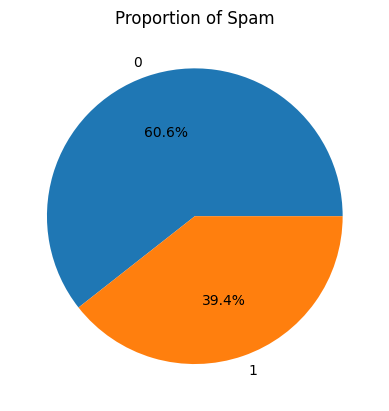

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
category_counts = dt['spam'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Spam")
plt.show()

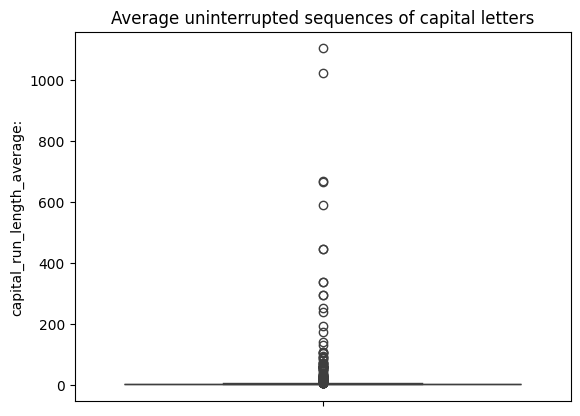

In [ ]:
sns.boxplot(dt['capital_run_length_average:'])
plt.title('Average uninterrupted sequences of capital letters')
plt.show()

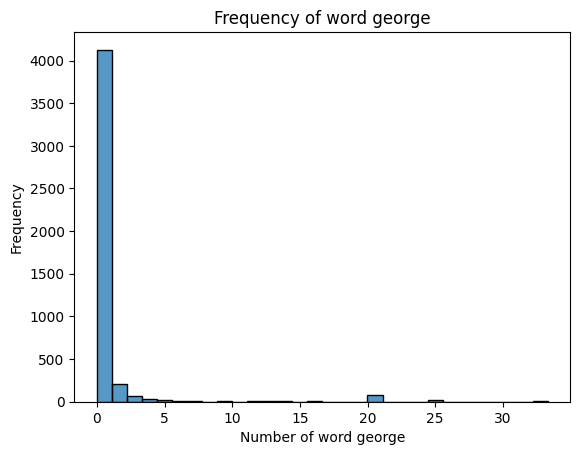

In [ ]:
sns.histplot(dt['word_freq_george:'], bins=30, kde=False)
plt.title("Frequency of word george")
plt.xlabel("Number of word george")
plt.ylabel("Frequency")
plt.show()

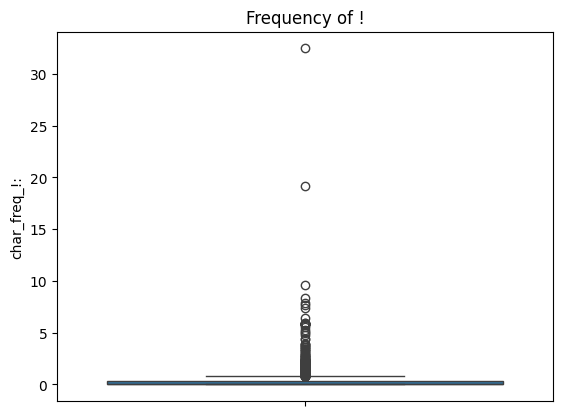

In [ ]:
sns.boxplot(dt['char_freq_!:'])
plt.title('Frequency of !')
plt.show()

###4.Choose one model from Part A Question 4.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
y=dt['spam']
x=dt[['capital_run_length_average:','word_freq_george:','char_freq_!:']]
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(3450, 3)
(1151, 3)


In [ ]:
from scipy.stats import skew, kurtosis
print("Skewness:", skew(dt['spam']))
print("Kurtosis:", kurtosis(dt['spam']))

Skewness: 0.4336699490231419
Kurtosis: -1.8119303753142655


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
KNN=KNeighborsClassifier()
pg={'n_neighbors': np.arange(1, 15, 2)}
gd=GridSearchCV(KNN, pg, cv=5,scoring='f1')
gd.fit(X_train,y_train)
print("Best cross-validation score: ", gd.best_score_)
print("Best parameters: {}".format(gd.best_params_))
print("Test-set score: {:.3f}".format(gd.score(X_test, y_test)))

Best cross-validation score:  0.8205802044170787
Best parameters: {'n_neighbors': 5}
Test-set score: 0.836


I will use k=5, because this dataset is not large. This performs well as k=10 but more time saving.

The best mean cross-validation score here is 0.82.

The best parameters I will use is n neighbors of 5 which can give me the best f1 score.

###5.Repeat the previous question but with a different model from Part A Question 4.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(penalty=None,max_iter=10000)
pg1={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'] }
gd1=GridSearchCV(logreg, pg1, cv=5,scoring='f1')
gd1.fit(X_train,y_train)
print("Best cross-validation score:", gd1.best_score_)
print("Best parameters: {}".format(gd1.best_params_))
print("Test-set score: {:.3f}".format(gd1.score(X_test, y_test)))

Best cross-validation score:  0.7962211996245013
Best parameters: {'solver': 'newton-cg'}
Test-set score: 0.812


The best mean score of 5 fold cross validation is 0.796.

I used max_iter=10000 to extend the limit of iterations to adapt to the model. The parameter I will use for the model is solver:"newton-cg" that gives me best f1 score.

###6.Repeat the previous question but with a different model from Part A Question 4.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVCm = SVC(kernel='linear')
pg2={'C': [0.1, 1, 10, 100]}
gd2=GridSearchCV(SVCm,pg2,cv=5,scoring='f1')
gd2.fit(X_train,y_train)
print("Best cross-validation score:", gd2.best_score_)
print("Best parameters: {}".format(gd2.best_params_))
print("Test-set score: {:.3f}".format(gd2.score(X_test, y_test)))

Best cross-validation score: 0.80887770543364
Best parameters: {'C': 100}
Test-set score: 0.820


The best mean cross validation score is 0.809.

The parameters I use for the model is C=100 for regularization that can give me the best f1 score.

###7.Repeat the previous question but with a different model from Part A Question 4.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
pg3={'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]}
gd3=GridSearchCV(tree,pg3,cv=5,scoring='f1')
gd3.fit(X_train, y_train)
print("Best cross-validation score:", gd3.best_score_)
print("Best parameters: {}".format(gd3.best_params_))
print("Test-set score: {:.3f}".format(gd3.score(X_test, y_test)))

Best cross-validation score: 0.8438602236702344
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test-set score: 0.836


The best mean cross-validation score is 0.844.

The parameter I will use for the model will be 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2 which can give me the best f1 score.

###8.Now rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?

In [ ]:
y1=dt['spam']
x1=dt[['capital_run_length_average:','word_freq_george:','char_freq_!:','word_freq_internet:','word_freq_our:','char_freq_$:']]
X_train, X_test, y_train, y_test = train_test_split(x1, y1,random_state=42)
print(X_train.shape)
print(X_test.shape)

(3450, 6)
(1151, 6)


In [ ]:
KNN1=KNeighborsClassifier()
pg4={'n_neighbors': np.arange(1, 15, 2)}
gd4=GridSearchCV(KNN1, pg4, cv=5,scoring='f1')
gd4.fit(X_train,y_train)
print("KNN Best cross-validation score:", gd4.best_score_)
print("KNN Best parameters: {}".format(gd.best_params_))
print("KNN Test-set score: {:.3f}".format(gd.score(X_test, y_test)))

logreg1=LogisticRegression(penalty=None,max_iter=10000)
pg5={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'] }
gd5=GridSearchCV(logreg1, pg5, cv=5,scoring='f1')
gd5.fit(X_train,y_train)
print("Logistic Best cross-validation score:",gd5.best_score_)
print("Logistic Best parameters: {}".format(gd5.best_params_))
print("Logistic Test-set score: {:.3f}".format(gd5.score(X_test, y_test)))

SVCm1 = SVC(kernel='linear')
pg6={'C': [0.1, 1, 10, 100]}
gd6=GridSearchCV(SVCm1,pg6,cv=5,scoring='f1')
gd6.fit(X_train,y_train)
print("SVC Best cross-validation score:",gd6.best_score_)
print("SVC Best parameters: {}".format(gd5.best_params_))
print("SVC Test-set score: {:.3f}".format(gd5.score(X_test, y_test)))


tree1 = DecisionTreeClassifier()
pg7={'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]}
gd7=GridSearchCV(tree1,pg7,cv=5,scoring='f1')
gd7.fit(X_train, y_train)
print("Decision Tree Best cross-validation score:", gd7.best_score_)
print("Decision Tree Best parameters: {}".format(gd7.best_params_))
print("Decision Tree Test-set score: {:.3f}".format(gd7.score(X_test, y_test)))

KNN Best cross-validation score: 0.8205802044170787
KNN Best parameters: {'n_neighbors': 5}
KNN Test-set score: 0.836
Logistic Best cross-validation score: 0.7962211996245013
Logistic Best parameters: {'solver': 'newton-cg'}
Logistic Test-set score: 0.812
SVC Best cross-validation score: 0.80887770543364
SVC Best parameters: {'solver': 'newton-cg'}
SVC Test-set score: 0.812
Decision Tree Best cross-validation score: 0.8424328209264689
Decision Tree Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Test-set score: 0.831


Not really. I found for KNN and Logistical model, the test scores are not changed. The test scores of SVC and decision tree, unexpectedly decrease. It may be because three extra variabes I added are unimportant or redundant to the model prediction .

##9.What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?

I think Word frequences of "Urgent", "Warning", "Final", "Risk","Prize","Password","Verify" are also important features that may help predict spam emails.These words may attract people's attention and are more easily to be in the trap if the spam is about asking private imformantion of their bank, address.

And I think email frequencies also matter because spam email may be sent more often than other marketing emails in order to call the attention on them.